In [1]:
using StatsBase
using Plots
using JLD2
using Graphs
using SimpleWeightedGraphs
using BlossomV
using GraphsMatching

In [138]:
include("src/main.jl")
include("src/mwpm.jl")
include("src/local.jl")

MV (generic function with 2 methods)

In [139]:
function circuit(L::Int, T::Int, p::Float64, peff::Float64, q::Float64)
    ρ = initialstate(L)
    Ms = zeros(Float64, T+1)

    for t in 1:T
        ρ = noiselayer(ρ, p)
        ρ = correct(ρ, peff, q)
        Ms[t+1] = magnetization(ρ)
    end

    return Ms
end

function sample(L::Int, T::Int, p::Float64, peff::Float64, q::Float64, samples::Int)
    Ms = zeros(Float64, T+1)
    for i in 1:samples
        Ms += circuit(L, T, p, peff, q)
    end
    return Ms/samples
end

sample (generic function with 2 methods)

In [140]:
function basic_circuit(L::Int, T::Int, p::Float64, q::Float64)
    ρ = initialstate(L)
    Ms = zeros(Float64, T+1)

    for t in 1:T
        ρ = noiselayer(ρ, p)
        ρ  = basic_correct(ρ, q)
        Ms[t+1] = magnetization(ρ)
    end

    return Ms
end

function basic_sample(L::Int, T::Int, p::Float64, q::Float64, samples::Int)
    Ms = zeros(Float64, T+1)
    for i in 1:samples
        Ms += basic_circuit(L, T, p, q)
    end
    return Ms/samples
end

basic_sample (generic function with 1 method)

In [141]:
function MVsample(L::Int, T::Int, p::Float64, q::Float64)
    ρ = initialstate(L)
    Ms = zeros(Float64, T+1)

    Ms[1] = magnetization(ρ)

    for t in 1:T
        ρ = noiselayer(ρ, p)
        checks = measure(ρ, q)
        ρ = MV(ρ, checks)
        Ms[t+1] = magnetization(ρ)
    end
    return Ms
end

function MVsample(L::Int, T::Int, p::Float64, q::Float64, samples::Int)
    M1s = zeros(Float64, T+1)
    M2s = zeros(Float64, T+1)
    for _ in 1:samples
        Ms = MVsample(L, T, p, q)
        M1s .+= Ms
        M2s .+= Ms.^2
    end
    M1s ./= samples
    M2s ./= samples
    return M1s, M2s
end

MVsample (generic function with 2 methods)

In [185]:
L = 8
T = 50L
q = 0.1
p = 0.1
basic_Ms = basic_sample(L, T, p, q, 1000)

401-element Vector{Float64}:
 0.0
 0.13221875
 0.151359375
 0.17621875
 0.206859375
 0.223359375
 0.24021875
 0.25625
 0.273515625
 0.28296875
 ⋮
 0.49109375
 0.488703125
 0.4879375
 0.493625
 0.47928125
 0.4779375
 0.469375
 0.4756875
 0.475859375

In [188]:
L = 4
T = 50L
q = 0.1
p = 0.1
basic_Ms_4 = basic_sample(L, T, p, q, 10000)

201-element Vector{Float64}:
 0.0
 0.10409375
 0.13691875
 0.17255
 0.20220625
 0.23114375
 0.25240625
 0.2798375
 0.30109375
 0.31815
 ⋮
 0.50065
 0.49956875
 0.4976
 0.5020125
 0.5046375
 0.5029375
 0.50335
 0.49861875
 0.4988625

In [186]:
L = 8
T = 50L
q = 0.1
p = 0.1
peff = 0.2
Ms = sample(L, T, p, peff, q, 1000)

401-element Vector{Float64}:
 0.0
 0.03990625
 0.054359375
 0.065453125
 0.067734375
 0.07203125
 0.0826875
 0.082734375
 0.08446875
 0.09275
 ⋮
 0.46890625
 0.47165625
 0.467796875
 0.470203125
 0.47025
 0.47128125
 0.465140625
 0.467921875
 0.46815625

In [189]:
L = 4
T = 50L
q = 0.1
p = 0.1
peff = 0.2
Ms_4 = sample(L, T, p, peff, q, 10000)

201-element Vector{Float64}:
 0.0
 0.04534375
 0.06764375
 0.0820625
 0.0957875
 0.10691875
 0.12168125
 0.13425625
 0.14445625
 0.15908125
 ⋮
 0.5079875
 0.50700625
 0.50665625
 0.5073875
 0.50614375
 0.5068375
 0.50714375
 0.506525
 0.5083875

In [187]:
L = 8
T = 50L
q = 0.1
p = 0.1


MV_Ms = MVsample(L, T, p, q, 10000)[1]

401-element Vector{Float64}:
 0.0
 0.033071875
 0.049675
 0.059978125
 0.067721875
 0.07433125
 0.07945625
 0.0838890625
 0.0884390625
 0.0926859375
 ⋮
 0.4351328125
 0.4351421875
 0.4358390625
 0.436553125
 0.437709375
 0.4371921875
 0.437534375
 0.43735
 0.4378921875

In [190]:
L = 4
T = 50L
q = 0.1
p = 0.1


MV_Ms_4 = MVsample(L, T, p, q, 10000)[1]

201-element Vector{Float64}:
 0.0
 0.03305
 0.049775
 0.06159375
 0.07105625
 0.077775
 0.08408125
 0.0904875
 0.0961625
 0.1017625
 ⋮
 0.4799875
 0.4794
 0.4797375
 0.48049375
 0.4808625
 0.48138125
 0.48185
 0.48236875
 0.48193125

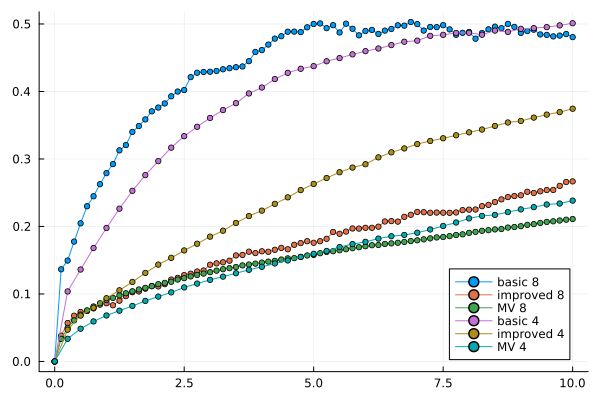

In [ ]:
plt = plot()

L = 8
xs = collect(0:10L)
plot!(plt, xs/8, basic_Ms, label="basic 8", m=3)
plot!(plt, xs/8, Ms, label="improved 8", m=3)
plot!(plt, xs/8, MV_Ms, label="MV 8", m=3)

L = 4
xs = collect(0:10L)
plot!(plt, xs/4, basic_Ms_4, label="basic 4", m=3)
plot!(plt, xs/4, Ms_4, label="improved 4", m=3)
plot!(plt, xs/4, MV_Ms_4, label="MV 4", m=3)

plt

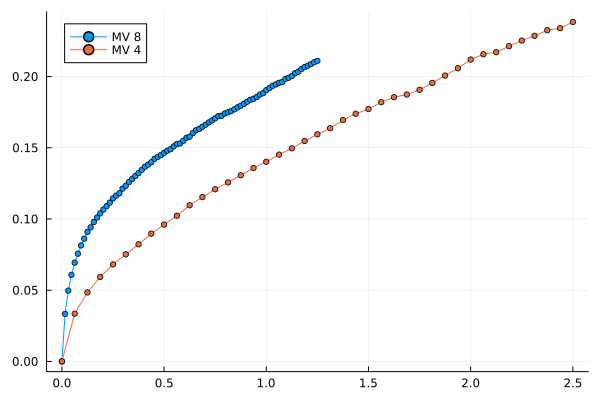

In [184]:
plt = plot()

z = 2

L = 8
xs = collect(0:10L)
# plot!(plt, xs/8, basic_Ms, label="basic 8", m=3)
# plot!(plt, xs/8, Ms, label="improved 8", m=3)
plot!(plt, xs/L^z, MV_Ms, label="MV 8", m=3)

L = 4
xs = collect(0:10L)
# plot!(plt, xs/4, basic_Ms_4, label="basic 4", m=3)
# plot!(plt, xs/4, Ms_4, label="improved 4", m=3)
plot!(plt, xs/L^z, MV_Ms_4, label="MV 4", m=3)

plt

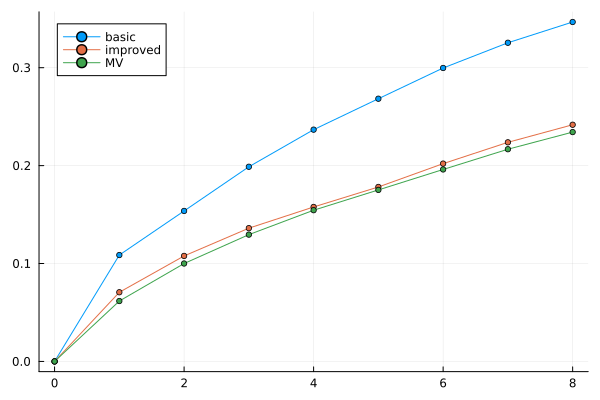

In [157]:
plt = plot()

xs = collect(0:T)
plot!(plt, xs, basic_Ms_4, label="basic", m=3)
plot!(plt, xs, Ms_4, label="improved", m=3)
plot!(plt, xs, MV_Ms_4, label="MV", m=3)

In [94]:
horizontal_checks = [0 0 0 0 0 0 0 0
                     0 0 0 0 0 0 0 0
                     0 0 0 0 0 0 0 0
                     0 0 0 0 0 0 0 0
                     0 0 1 1 1 1 0 0
                     0 0 0 0 0 0 0 0
                     0 0 0 0 0 0 0 0
                     0 0 0 0 0 0 0 0]

vertical_checks = [0 0 0 0 0 0 0 0
                   0 0 0 0 0 0 0 0
                   0 0 0 0 0 0 0 0
                   0 0 0 0 0 1 0 0
                   0 0 0 0 0 1 0 0
                   0 0 0 0 0 0 0 0
                   0 0 0 0 0 0 0 0
                   0 0 0 0 0 0 0 0]

new_horizontal_checks, new_vertical_checks = heal((horizontal_checks, vertical_checks), 0.5, 0.1)
println(detect_charges(new_horizontal_checks, new_vertical_checks))

new_horizontal_checks, new_vertical_checks = basic_heal((horizontal_checks, vertical_checks))
println(detect_charges(new_horizontal_checks, new_vertical_checks))

Tuple{Int64, Int64}[]
whoops
Tuple{Int64, Int64}[]


In [95]:
track_domains((new_horizontal_checks, new_vertical_checks))

8×8 Matrix{Bool}:
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  1
 0  0  0  0  0  0  1  1
 1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1

In [86]:
A                 = [0 0 0 0 0 0 0 0
                     0 0 0 0 0 0 0 0
                     0 0 0 0 0 1 0 0
                     0 0 0 0 1 0 0 0
                     0 0 0 0 1 1 0 0
                     0 0 0 0 0 0 0 0
                     0 0 0 0 0 0 0 0
                     0 0 0 0 0 0 0 0]

B               = [0 0 0 0 0 0 0 0
                   0 0 0 0 0 0 0 0
                   0 0 0 0 0 0 0 0
                   0 0 0 0 1 1 0 0
                   0 0 0 1 0 1 0 0
                   0 0 0 0 0 0 0 0
                   0 0 0 0 0 0 0 0
                   0 0 0 0 0 0 0 0]

detect_charges(A, B)

Tuple{Int64, Int64}[]

In [79]:
A - new_horizontal_checks

8×8 Matrix{Int64}:
 0  0  0   0  0   0  0  0
 0  0  0   0  0   0  0  0
 0  0  0   0  0   1  0  0
 0  0  0   0  0  -1  0  0
 0  0  0  -1  1   0  0  0
 0  0  0   0  0   0  0  0
 0  0  0   0  0   0  0  0
 0  0  0   0  0   0  0  0

In [72]:
new_horizontal_checks

8×8 Matrix{Int64}:
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  1  1  0  0
 0  0  0  1  0  1  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0

In [73]:
new_vertical_checks

8×8 Matrix{Int64}:
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0
 0  0  0  0  1  0  0  0
 0  0  0  0  1  1  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0

In [75]:
detect_charges(new_horizontal_checks, new_vertical_checks)

6-element Vector{Tuple{Int64, Int64}}:
 (3, 5)
 (4, 4)
 (4, 5)
 (5, 3)
 (6, 2)
 (6, 3)